### Classification
FIRA 빅데이터 플랫폼 과정 <데이터마이닝> - 2017.08.21.월 14:00-18:00

### 1. Data
- 1-1. `german_classfication.csv`
- 1-2. Preprocessing : Dummy Variables & Scaling & Change Labels
- 1-3. Train-Test Split : `sklearn.model_selection.test_train_split`

### 2. Logistic Regression
- 2-1. `sklearn.linear_model.LogisticRegression`
- 2-2. Evaluation : Confusion Matrix & ROC Curve

### 3. Decision Tree
- 3-1. `sklearn.tree.DecisionTreeClassifier`
- 3-2. How Does it Decide? - Visualization of Decision Tree via `graphviz`
- 3-3. Interpret Clustering by Decision Tree

### 4. Random Forest
- 4-1. `sklearn.ensemble.RandomForestClassifier`
- 4-2. Change Threshold to Decide

### 5. 실습 : 우량 등급 예측 모델 

### 1. Data
---

#### 1-1.  `german_classification.csv`
---
`german_classification.csv`는 독일 은행에 신용거래를 신청한 신청자 1000명의 데이터이다. 관찰번호(OBS#)를 제외하고 총 29개의 변수로 이루어져있으며, 각 신청자들의 '신용 등급'이 예측하고자 하는 변수이다. 신용 등급은 '우량(1)' 혹은 '불량(2)'으로 나누어지며, 각각 700명, 300명으로 구성되어 있다. 이 분석의 목적은 불량 등급일 사람을 미리 예측하여, 그들에게 신용 대출을 해주지 않도록 하는 것이다.

In [39]:
import pandas as pd

In [14]:
# 변수별 설명 : CodeList
pd.read_csv('CodeList-classification.csv').iloc[:, :4]

,변수명,설명,변수 종류,코드 설명
0,OBS#,관찰번호,-,일련번호
1,CHK_ACCT,당좌 예금 계좌 상태,범주형,"0 : 0 DM 미만, 1 : 0~200 DM 미만, 2 : 200 DM 이상, 3..."
2,DURATION,신용거래 개월 수,수치형,NaN
3,HISTORY,신용기록,범주형,"0 : 신용거래 없음, 1 : 기한 내 변제, 2 : 변제 기한 남음, 3 : 연체..."
4,NEW_CAR,신용목적,이진수형,신형 자동차 0 : 없음 1 : 있음
5,USED_CAR,신용목적,이진수형,중고 자동차 0 : 없음 1 : 있음
6,FURNITURE,신용목적,이진수형,가구/주방기기 0 : 없음 1 : 있음
7,RADIO/TV,신용목적,이진수형,라디오/TV 0 : 없음 1 : 있음
8,EDUCATION,신용목적,이진수형,교육 0 : 없음 1 : 있음
9,RETAINING,신용목적,이진수형,재교육 0 : 없음 1 : 있음


In [15]:
# df
df = pd.read_csv('german_classification.csv').set_index('OBS#')

#### 1-2. Preprocessing : Dummy Variables & Scaling & Change Labels

In [16]:
# dummy varaibles : preprocessed_df
get_dummies_cols = ['CHK_ACCT', 'HISTORY', 'SAV_ACCT', 'EMPLOYMENT', 'JOB']
dummied_df = pd.get_dummies(df, columns=get_dummies_cols)
dummied_df

,DURATION,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETAINING,AMOUNT,INSTALL_RATE,MALE_DIV,...,SAV_ACCT_4,EMPLOYMENT_0,EMPLOYMENT_1,EMPLOYMENT_2,EMPLOYMENT_3,EMPLOYMENT_4,JOB_0,JOB_1,JOB_2,JOB_3
OBS#,,,,,,,,,,,,,,,,,,,,,
0,6,0,0,0,1,0,0,1169,4,0,...,1,0,0,0,0,1,0,0,1,0
1,48,0,0,0,1,0,0,5951,2,0,...,0,0,0,1,0,0,0,0,1,0
2,12,0,0,0,0,1,0,2096,2,0,...,0,0,0,0,1,0,0,1,0,0
3,42,0,0,1,0,0,0,7882,2,0,...,0,0,0,0,1,0,0,0,1,0
4,24,1,0,0,0,0,0,4870,3,0,...,0,0,0,1,0,0,0,0,1,0
5,36,0,0,0,0,1,0,9055,2,0,...,1,0,0,1,0,0,0,1,0,0
6,24,0,0,1,0,0,0,2835,3,0,...,0,0,0,0,0,1,0,0,1,0
7,36,0,1,0,0,0,0,6948,2,0,...,0,0,0,1,0,0,0,0,0,1
8,12,0,0,0,1,0,0,3059,2,1,...,0,0,0,0,1,0,0,1,0,0


In [17]:
# scaling : min-max
# scaling_cols
scaling_cols = ['DURATION', 'INSTALL_RATE', 'AGE', 'NUM_CREDITS', 'AMOUNT']
preprocessed_df = dummied_df.copy()
preprocessed_df[scaling_cols] = (preprocessed_df[scaling_cols]-preprocessed_df[scaling_cols].min()) / (preprocessed_df[scaling_cols].max()-preprocessed_df[scaling_cols].min())
preprocessed_df

,DURATION,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETAINING,AMOUNT,INSTALL_RATE,MALE_DIV,...,SAV_ACCT_4,EMPLOYMENT_0,EMPLOYMENT_1,EMPLOYMENT_2,EMPLOYMENT_3,EMPLOYMENT_4,JOB_0,JOB_1,JOB_2,JOB_3
OBS#,,,,,,,,,,,,,,,,,,,,,
0,0.029412,0,0,0,1,0,0,0.050567,1.000000,0,...,1,0,0,0,0,1,0,0,1,0
1,0.647059,0,0,0,1,0,0,0.313690,0.333333,0,...,0,0,0,1,0,0,0,0,1,0
2,0.117647,0,0,0,0,1,0,0.101574,0.333333,0,...,0,0,0,0,1,0,0,1,0,0
3,0.558824,0,0,1,0,0,0,0.419941,0.333333,0,...,0,0,0,0,1,0,0,0,1,0
4,0.294118,1,0,0,0,0,0,0.254209,0.666667,0,...,0,0,0,1,0,0,0,0,1,0
5,0.470588,0,0,0,0,1,0,0.484483,0.333333,0,...,1,0,0,1,0,0,0,1,0,0
6,0.294118,0,0,1,0,0,0,0.142236,0.666667,0,...,0,0,0,0,0,1,0,0,1,0
7,0.470588,0,1,0,0,0,0,0.368548,0.333333,0,...,0,0,0,1,0,0,0,0,0,1
8,0.117647,0,0,0,1,0,0,0.154561,0.333333,1,...,0,0,0,0,1,0,0,1,0,0


In [18]:
# change Label
preprocessed_df.RESPONSE = df.RESPONSE-1
preprocessed_df.RESPONSE

OBS#
0      0
1      1
2      0
3      0
4      1
5      0
6      0
7      0
8      0
9      1
10     1
11     1
12     0
13     1
14     0
15     1
16     0
17     0
18     1
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     1
      ..
970    0
971    0
972    1
973    1
974    0
975    0
976    0
977    0
978    1
979    1
980    1
981    1
982    0
983    1
984    0
985    0
986    0
987    0
988    0
989    0
990    0
991    0
992    0
993    0
994    0
995    0
996    0
997    0
998    1
999    0
Name: RESPONSE, Length: 1000, dtype: int64

In [20]:
# split X, y 
X, y = preprocessed_df.drop('RESPONSE', axis=1), preprocessed_df.RESPONSE

#### 1-3. Train-Test Split : `sklearn.model_selection.train_test_split`
---
지도학습을 위해 주어진 데이터를 train set과 test set으로 나눈다. 이 때, y의 class 비율 (class imbalance)을 고려해서 나누어준다.

In [21]:
# import packages
from sklearn.model_selection import train_test_split

In [40]:
# train_test_split with 'stratify'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=77, stratify=y)

In [41]:
splited_list = train_test_split(X, y, test_size=0.25, random_state=77, stratify=y) 
X_train = splited_list[0]

In [24]:
# is it true...?
y_test[y_test==1].count()

75

In [34]:
train_test_split(X, y)
# [train_df, test_df, train_df, test_df]

[      DURATION  NEW_CAR  USED_CAR  FURNITURE  RADIO/TV  EDUCATION  RETAINING  \
 OBS#                                                                           
 245   0.294118        0         0          0         0          0          0   
 344   0.088235        1         0          0         0          0          0   
 952   0.294118        0         1          0         0          0          0   
 920   0.205882        0         0          1         0          0          0   
 197   0.117647        0         0          1         0          0          0   
 835   0.117647        1         0          0         0          0          0   
 545   0.294118        1         0          0         0          0          0   
 968   0.558824        0         0          0         1          0          0   
 802   0.235294        0         0          1         0          0          0   
 536   0.029412        1         0          0         0          0          0   
 272   0.647059        1    

### 2. Logistic Regression
---

#### 2-1. `sklearn.linear_model.LogisticRegression`
---

In [42]:
# import packages
from sklearn.linear_model import LogisticRegression

In [53]:
# Parameters
class_weight = 'balanced'
# fit_intercept = True # 상수를 넣을 것인지
# multi_class='ovr' # 'multinomial'

In [43]:
# what does 'balanced' mean?
import numpy as np

n_samples = len(y)
n_classes = len(np.unique(y))
class_weight = n_samples/(n_classes*np.bincount(y))

In [118]:
print(len(y)/(4*np.bincount(y)))
print(np.bincount(y))

[        inf  2.5862069   0.5033557   0.99337748  1.61290323]
[  0 116 596 302 186]


/home/dongminshin/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


In [56]:
# lr_model
lr_model = LogisticRegression(class_weight=class_weight)
lr_model

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [57]:
# fit to model
lr_model.fit(X=X_train, y=y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [58]:
# get predictions
lr_model.predict(X=X_test)

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0])

In [59]:
# get accuracy
lr_model.score(X=X_test, y=y_test)

0.69999999999999996

In [63]:
# result_y_test_df 
result_y_test_df = pd.DataFrame(y_test)
result_y_test_df['lr'] = lr_model.predict(X=X_test) 
result_y_test_df

,RESPONSE,lr
OBS#,,
984,0,0
736,1,1
205,0,1
743,0,1
146,0,1
450,0,0
834,1,0
279,0,0
806,0,0


#### 2-2. Evaluation : Confusion Matrix & ROC Curve
---

In [61]:
# import packages for confusion matrix
from sklearn.metrics import confusion_matrix

In [62]:
# confusion_matrix
confusion_matrix(y_pred=lr_model.predict(X=X_test), y_true=y_test)
# [[ true negative , false positive],
# [false negative], [true positive]]

array([[120,  55],
       [ 20,  55]])

In [21]:
# import pacakages for ROC curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = {0: .2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [22]:
# decision_function - for 'thresholds'

array([ 0.29007388, -1.47319223, -1.60436964, -2.35298706,  3.31305357,
        0.09714904,  2.90269408, -1.1644483 , -2.2628256 , -0.27244476,
       -2.09877743,  0.02241618, -1.95411113, -0.87375713,  0.2391623 ,
        0.19665617, -1.61463373, -1.33792918,  1.83252401,  1.94166406,
       -1.16811536,  1.40693309, -1.25287012,  0.47392317, -0.05453412,
       -1.01938259,  1.04689835,  1.66800452,  2.54451566, -0.70163143,
       -0.54117207,  0.4338663 , -2.54547856, -1.10011569,  1.61966943,
        0.03828596, -2.60210888, -1.01818568,  0.44311007,  0.82339686,
       -2.40422108,  0.73052805,  1.36320288, -2.49623111,  0.14354419,
        0.35800413,  2.18637551,  1.69245093,  2.55748591,  1.703246  ,
        0.27962209, -2.61445084, -0.90886529, -1.75627598,  2.08590031,
       -2.5905352 , -1.51674206,  1.21712338, -0.3724317 , -0.09730109,
        0.46699821, -2.11252589,  0.92638345, -3.02376096, -1.4387989 ,
       -2.29246612,  1.4642219 ,  1.57700162, -1.47671877, -0.52

In [23]:
# roc_curve : fpr, tpr, thresholds

In [24]:
# auc

0.78948571428571435

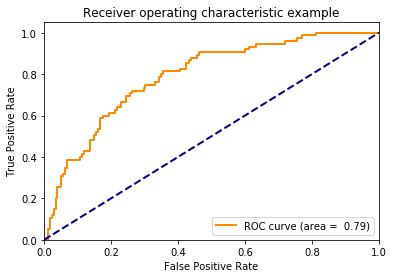

In [27]:
plot_roc_curve(fpr, tpr, roc_auc)

### 3. Decision Tree
---

#### 3-1. `sklearn.tree.DecisionTreeClassifier`
---

In [67]:
# import packages
from sklearn.tree import DecisionTreeClassifier

In [97]:
# set parameters
class_weight = 'balanced'
max_depth = 3

In [98]:
# dt_model 
dt_model = DecisionTreeClassifier(class_weight=class_weight, max_depth=max_depth)

In [99]:
# fit to model
dt_model.fit(X=X_train, y=y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [100]:
# get predictions
dt_model.predict(X=X_test)

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0])

In [101]:
# get score
dt_model.score(X=X_test, y=y_test)

0.58799999999999997

In [102]:
# result_y_test_df
result_y_test_df['dt'] = dt_model.predict(X=X_test)
result_y_test_df

,RESPONSE,lr,dt
OBS#,,,
984,0,0,0
736,1,1,1
205,0,1,1
743,0,1,1
146,0,1,0
450,0,0,0
834,1,0,1
279,0,0,0
806,0,0,0


In [103]:
# confusion matrix
confusion_matrix(y_pred=dt_model.predict(X=X_test), y_true=y_test)

array([[85, 90],
       [13, 62]])

#### 3-2. How Does it Decide? - Visualization of Decision Tree via `graphviz`
---

In [104]:
# import packages for export tree
from sklearn.tree import export_graphviz

In [105]:
# export tree as .dot
with open('test_tree.dot', 'w') as f:
    export_graphviz(dt_model, f, feature_names=X.columns)

In [106]:
# import packages for draw tree
import graphviz

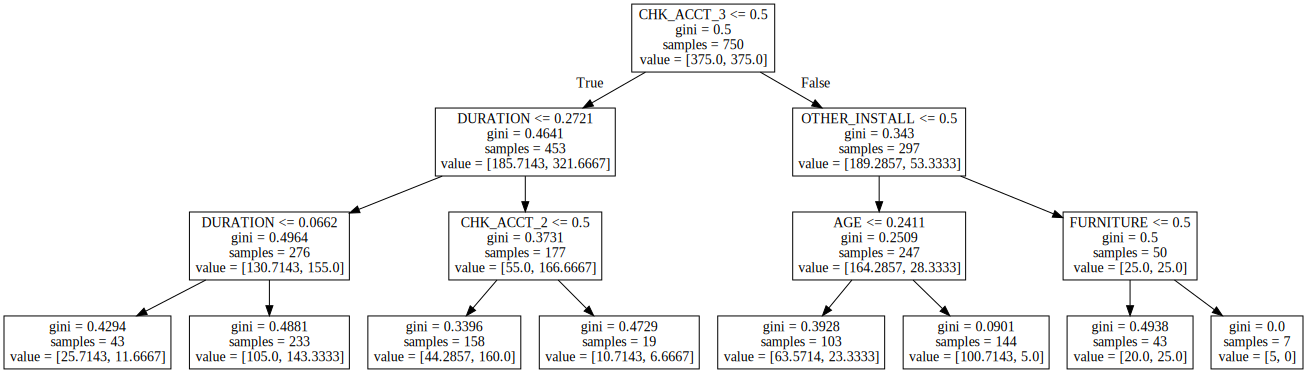

In [107]:
# open .dot & visualize
with open('test_tree.dot', 'r') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [95]:
# export to .png
dot -Tpng test_tree.dot -o tree.png 

#### 3-3. Interpret Clustering by Decision Tree

In [108]:
# open bath_soap_clustering.df
import pickle
with open('bath_soap_clustering.df', 'rb') as f:
    clustering_df = pickle.load(f)

In [111]:
y, X = clustering_df.predicted_labels, clustering_df.drop('predicted_labels', axis=1)

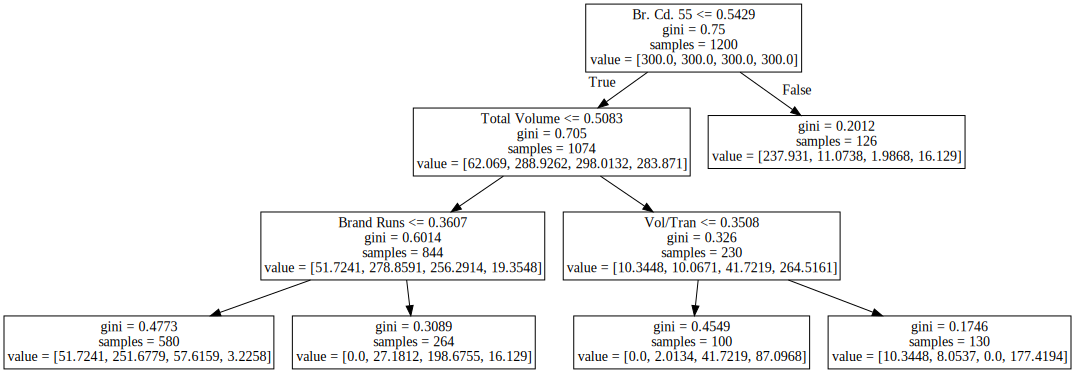

In [113]:
# build DT - max_depth, min_samples_leaf, class_weight
ip_model = DecisionTreeClassifier(max_depth=3, class_weight='balanced', min_samples_leaf=100).fit(X=X, y=y)

# visualize
dot_filename = 'clustering_tree.dot'
with open(dot_filename, 'w') as f:
    export_graphviz(ip_model, f, feature_names=clustering_df.columns)
    
with open(dot_filename, 'r') as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph) 

### 4. Random Forest
---

#### 4-1. `sklearn.ensemble.RandomForestClassifier`
---

In [120]:
# import packages
from sklearn.ensemble import RandomForestClassifier

In [122]:
# set parameters
n_estimators = 100
class_weight = 'balanced'
max_depth = 5

In [123]:
# rf_model
rf_model = RandomForestClassifier(n_estimators=n_estimators, class_weight=class_weight, max_depth=max_depth)

In [124]:
# fit to model
rf_model.fit(X=X_train, y=y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [125]:
# get predictions
rf_model.predict(X=X_test)

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0])

In [126]:
# get accuracy
rf_model.score(X=X_test, y=y_test)

0.71199999999999997

In [128]:
# result_y_test_df
result_y_test_df['rf'] = rf_model.predict(X=X_test) 
result_y_test_df

,RESPONSE,lr,dt,rf
OBS#,,,,
984,0,0,0,0
736,1,1,1,1
205,0,1,1,1
743,0,1,1,1
146,0,1,0,0
450,0,0,0,0
834,1,0,1,0
279,0,0,0,0
806,0,0,0,0


#### 4-2. Change Threshold to Decide 
---

In [129]:
# import numpy
import numpy as np

In [143]:
# change Treshold

# .predict_prob
y_pred_prob = lr_model.predict_proba(X=X_test)
thresholds = np.arange(0, 1, 0.01)

# acurracy
from sklearn.metrics import accuracy_score

accuracies = []
# accuracy_by_threshold
for t in thresholds:
    y_pred = y_pred_prob[:, 1] > t
    accuracies.append(accuracy_score(y_pred=y_pred, y_true=y_test))
accuracies

[0.29999999999999999,
 0.29999999999999999,
 0.30399999999999999,
 0.308,
 0.32000000000000001,
 0.32400000000000001,
 0.33600000000000002,
 0.35199999999999998,
 0.372,
 0.38400000000000001,
 0.39600000000000002,
 0.41599999999999998,
 0.42399999999999999,
 0.42799999999999999,
 0.44400000000000001,
 0.45600000000000002,
 0.46800000000000003,
 0.48399999999999999,
 0.49199999999999999,
 0.496,
 0.5,
 0.51200000000000001,
 0.51200000000000001,
 0.51600000000000001,
 0.52000000000000002,
 0.52800000000000002,
 0.52800000000000002,
 0.53600000000000003,
 0.54400000000000004,
 0.54800000000000004,
 0.57199999999999995,
 0.58799999999999997,
 0.59599999999999997,
 0.60799999999999998,
 0.61599999999999999,
 0.61599999999999999,
 0.63200000000000001,
 0.63600000000000001,
 0.64800000000000002,
 0.64800000000000002,
 0.65200000000000002,
 0.65600000000000003,
 0.67200000000000004,
 0.67600000000000005,
 0.68799999999999994,
 0.68799999999999994,
 0.68799999999999994,
 0.69599999999999995,
 0

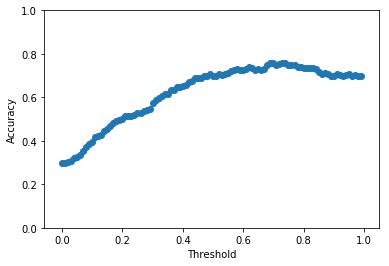

In [146]:
# threshold vs. accuracy score
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(thresholds, accuracies)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()

### 5. 실습 : 우량 등급 예측 모델
---
test set(random_state = 88)에 대한 accuracy가 가장 좋은 모델을 만들어라. 
* Logistic Regression, Decision Tree, Random Forest 중 하나를 사용하라.
* 변수의 개수를 적절히 조절하거나,
* threshold를 변경하거나,
* 모델에 들어갈 parameter를 조절하여라.
* Cross Validation은 고려하지 않는다.

실제로 우량 등급인 사람을 우량 등급으로 예측할 경우 \$100의 이익을 얻는 반면, 실제 불량 등급인 사람을 우량 등급으로 예측할 경우 \$500의 손실을 입는다고 할 때, 로지스틱 모델에서 우량 등급으로 예측을 내리기 위한 최적의 경계값(threshold)를 제시하여라. 
* 위에서 구한 모델에 대한 이익을 계산하여라.
* 10개 이상의 경계값 후보를 살펴보고, 각 경계값별로 이익을 계산하고 최대 이익을 내는 경계값을 찾아라
* 최대 이익을 내는 경계값과 모델의 경계값이 동일한가? 그 이유는 무엇인가?

In [153]:
sum(confusion_matrix(y_pred=y_pred, y_true=y_test).ravel()*[100, 0, -500, 0])

-20000